##**Fase 1: Propuesta inicial**

  La propuesta inicial de definir la funcionalidad de exportar en cada clase y recorrer el grafo para ejecutarla es válida en términos de desacoplamiento y aprovechamiento del polimorfismo. Sin embargo, las preocupaciones del arquitecto son válidas en cuanto a:

- **Alterar código existente:** Modificar las clases nodo para incluir la lógica de exportación a XML podría introducir errores y comprometer la estabilidad del código en producción.
- **Violación de la cohesión:** La responsabilidad principal de las clases nodo es trabajar con datos geográficos, y la exportación a XML no está directamente relacionada con esta función.
- **Falta de flexibilidad:** Si se requieren cambios en el formato de exportación o se agregan nuevas funcionalidades, modificar las clases nodo podría ser complejo y poco eficiente.

##**Fase 2: Solucion**

Para abordar estas preocupaciones, se propone una solución alternativa que minimiza los cambios en las clases nodo y permite una mayor flexibilidad:

- **Introducir una clase Visitante:** Crear una clase abstracta llamada Visitante con un método exportarXML(Nodo nodo). Esta clase representará la lógica de exportación a XML y encapsulará la responsabilidad de generar el formato XML adecuado.

- **Implementar clases Visitante concretas:** Para cada formato de exportación deseado (XML, CSV, JSON, etc.), se debe crear una clase concreta que herede de la clase abstracta Visitante y sobrescriba el método exportarXML(Nodo nodo). Cada clase implementará la lógica específica para generar el formato correspondiente.

- **Adaptar las clases nodo:** En cada clase nodo, se debe agregar un método aceptar(Visitante visitante). Este método permitirá a cada nodo "aceptar" una instancia de la clase Visitante y "permitirle" ejecutar la lógica de exportación.

- **Recorrer el grafo y aplicar la lógica de exportación:** Para exportar el grafo a XML, se debe recorrer el grafo utilizando un algoritmo de recorrido (BFS, DFS, etc.). En cada nodo visitado, se debe crear una instancia de la clase VisitanteXML (o la clase Visitante correspondiente al formato deseado) y llamar al método aceptar(Visitante visitante) del nodo. Esto permitirá que la clase Visitante ejecute la lógica de exportación en el nodo actual.

## Diagrama UML
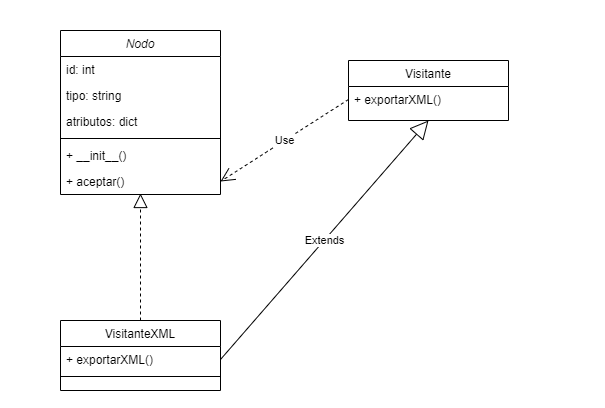

In [ ]:
class Nodo:
    def __init__(self, id, tipo, atributos):
        self.id = id
        self.tipo = tipo
        self.atributos = atributos

    def aceptar(self, visitante):
        visitante.exportarXML(self)

class Visitante:
    def exportarXML(self, nodo):
        raise NotImplementedError()

class VisitanteXML(Visitante):
    def exportarXML(self, nodo):
        # Logica de la exportacion
        pass

# Ejemplo de uso
nodo = Nodo(1, "Ciudad", {"nombre": "Medellín", "poblacion": 2.5})
visitanteXML = VisitanteXML()
nodo.aceptar(visitanteXML)
